# Вариант 13

#### Применяемые методы: 
    Метод опорных векторов 	
    Градиентный бустинг

## Задание

Для заданного набора данных постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных).

Для построения моделей используйте методы: Метод опорных векторов, Градиентный бустинг. 

Оцените качество моделей на основе подходящих метрик качества (двух).

    Какие метрики качества Вы использовали и почему? 

    Какие выводы Вы можете сделать о качестве построенных моделей? 

Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

## Реализация

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



%matplotlib inline 
sns.set(style="ticks")

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

### Смотрим на датасет

In [2]:
df = pd.read_csv('marvel-wikia-data.csv')

In [3]:
df.shape

(16376, 13)

In [4]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [5]:
df.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [6]:
print("Размер набора:")
print(f'В датасете {df.shape[0]} строк и {df.shape[1]} колонок.')

Размер набора:
В датасете 16376 строк и 13 колонок.


In [7]:
df.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [8]:
df.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [9]:
df = df.drop(columns=['ID', 'Year', 'GSM', 'urlslug', 'page_id'])
df = df.dropna()

In [10]:
df.shape

(4853, 8)

In [11]:
df.isnull().sum()

name                0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
dtype: int64

## Приступаем к выбору задачи и ее решению

Признак "ALIGN" выберем как целевой. Для этого заменим переменные

In [12]:
cleanup_nums = {"ALIGN":     {"Good Characters": 1, "Bad Characters": 0, "Neutral Characters": pd.NA, "Reformed Criminals": pd.NA}}

df = df.replace(cleanup_nums)

In [13]:
df.isnull().sum()

name                  0
ALIGN               900
EYE                   0
HAIR                  0
SEX                   0
ALIVE                 0
APPEARANCES           0
FIRST APPEARANCE      0
dtype: int64

In [14]:
df = df.dropna()
df.isnull().sum()

name                0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
dtype: int64

In [15]:
df["ALIGN"].value_counts()

ALIGN
0    2011
1    1942
Name: count, dtype: int64

In [16]:
df.dtypes

name                 object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
dtype: object

In [17]:
le = LabelEncoder()
arr_le = le.fit_transform(df['name'])
df['name'] = arr_le

In [18]:
le = LabelEncoder()
arr_le = le.fit_transform(df['EYE'])
df['EYE'] = arr_le

In [19]:
le = LabelEncoder()
arr_le = le.fit_transform(df['HAIR'])
df['HAIR'] = arr_le

In [20]:
le = LabelEncoder()
arr_le = le.fit_transform(df['SEX'])
df['SEX'] = arr_le

In [21]:
le = LabelEncoder()
arr_le = le.fit_transform(df['ALIVE'])
df['ALIVE'] = arr_le

In [22]:
le = LabelEncoder()
arr_le = le.fit_transform(df['FIRST APPEARANCE'])
df['FIRST APPEARANCE'] = arr_le

In [23]:
df.head()

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE
0,3345,1,8,5,3,1,4043.0,78
1,556,1,3,20,3,1,3360.0,418
3,1599,1,3,2,3,1,2961.0,427
4,3527,1,3,3,3,1,2258.0,539
5,383,1,3,11,3,1,2255.0,542


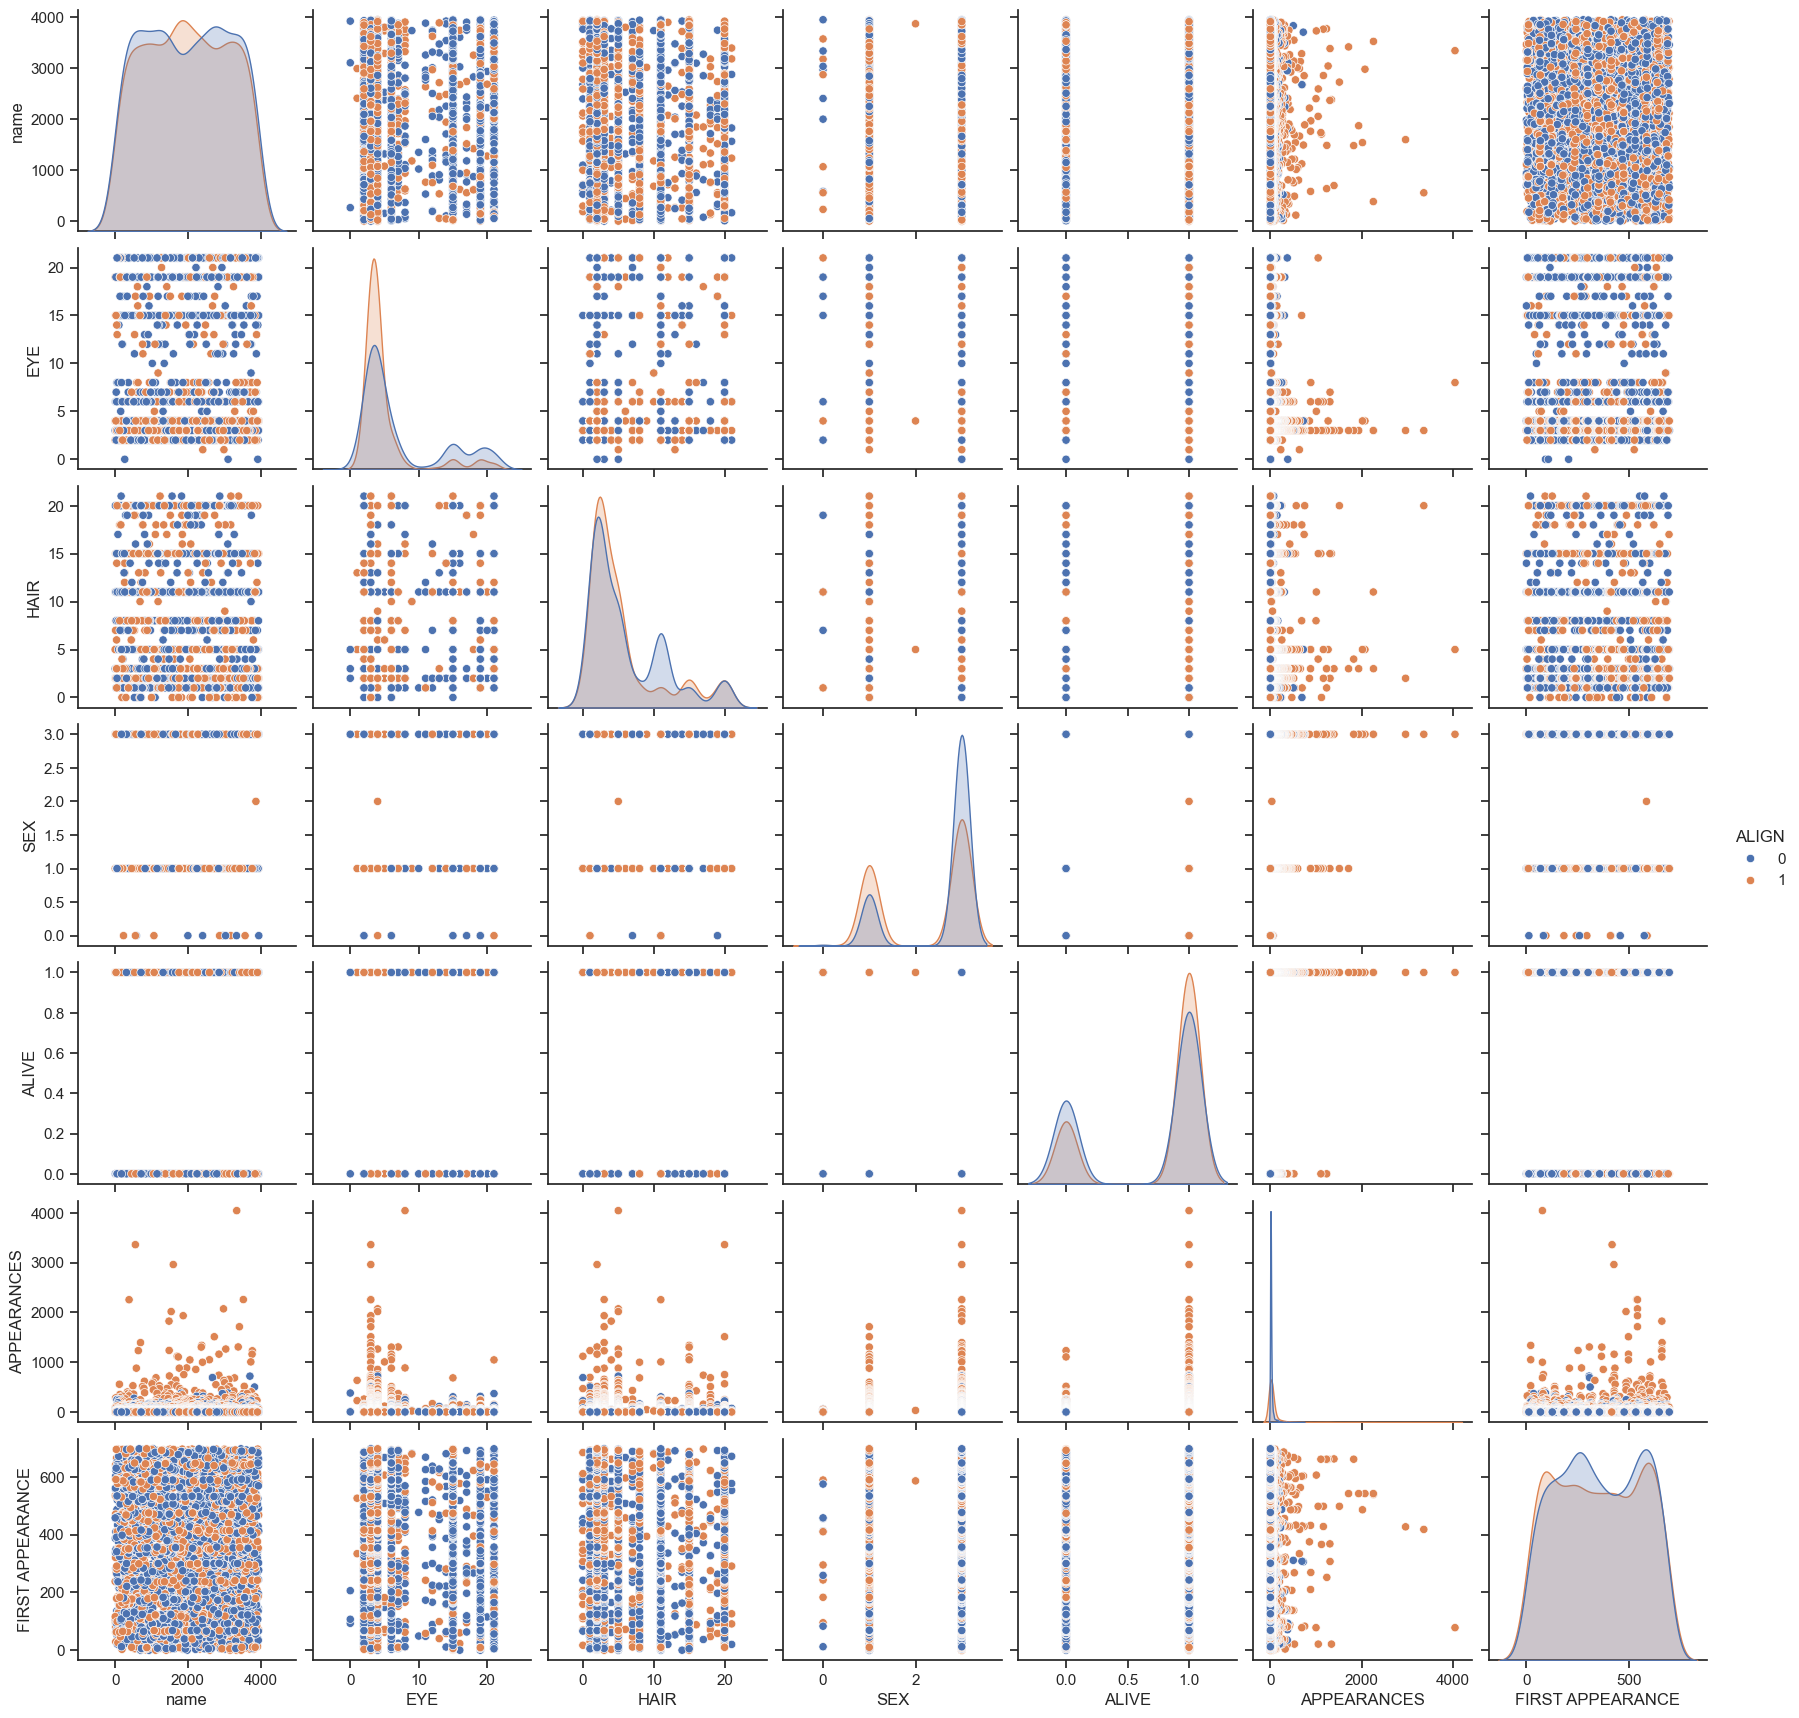

In [24]:
sns.pairplot(df, hue="ALIGN")

In [25]:
df = df.astype('int')

## С использованием метода train_test_split разделите выборку на обучающую и тестовую.

In [26]:
X = df.drop('ALIGN', axis=1)
Y = df['ALIGN']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(3162, 7), (791, 7)
(3162,), (791,)


In [28]:
SVC1 = SVC()
SVC1.fit(X_train, Y_train)

SVC()

In [29]:
My_KNN_target_1_0 = SVC1.predict(X_train)
My_KNN_Y_Pred = SVC1.predict(X_test)
print(f'Accuracy:',     accuracy_score(Y_train,My_KNN_target_1_0), accuracy_score(Y_test,My_KNN_Y_Pred))
print(f'Precision:',    precision_score(Y_train,My_KNN_target_1_0), precision_score(Y_test,My_KNN_Y_Pred))
print(f'F1:',           f1_score(Y_train,My_KNN_target_1_0), f1_score(Y_test,My_KNN_Y_Pred))
print(f'Recall:',       recall_score(Y_train,My_KNN_target_1_0), recall_score(Y_test,My_KNN_Y_Pred))

Accuracy: 0.543010752688172 0.5398230088495575
Precision: 0.8732394366197183 0.8857142857142857
F1: 0.14648552864737152 0.14553990610328638
Recall: 0.07994842037395229 0.0792838874680307


In [30]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)

GradientBoostingClassifier()

In [31]:
My_KNN_target_1_0 = GBC.predict(X_train)
My_KNN_Y_Pred = GBC.predict(X_test)
print(f'Accuracy:',     accuracy_score(Y_train,My_KNN_target_1_0),      accuracy_score(Y_test,My_KNN_Y_Pred))
print(f'Precision:',    precision_score(Y_train,My_KNN_target_1_0),     precision_score(Y_test,My_KNN_Y_Pred))
print(f'F1:',           f1_score(Y_train,My_KNN_target_1_0),            f1_score(Y_test,My_KNN_Y_Pred))
print(f'Recall:',       recall_score(Y_train,My_KNN_target_1_0),        recall_score(Y_test,My_KNN_Y_Pred))

Accuracy: 0.7359266287160026 0.649810366624526
Precision: 0.7327698309492848 0.6492146596858639
F1: 0.7296859825186144 0.6416558861578266
Recall: 0.7266279819471309 0.6342710997442456
